In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('../DATASETS/nlp-getting-started/train.csv',index_col='id')

In [4]:
test = pd.read_csv('../DATASETS/nlp-getting-started/test.csv')

In [5]:
train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [9]:
train.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
no_loc = train.drop('location', axis=1)

In [11]:
no_loc.head(3)

,keyword,text,target
id,,,
1,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,All residents asked to 'shelter in place' are ...,1


In [12]:
no_loc.dropna(inplace=True)

In [13]:
no_loc.head()

,keyword,text,target
id,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,Crying out for more! Set me ablaze,0
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [14]:
no_loc.isna().sum()

keyword    0
text       0
target     0
dtype: int64

In [18]:
import nltk 
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
df = no_loc

In [21]:
df.groupby('target').describe()

keyword                           text         \
         count unique          top freq count unique   
target                                                 
0         4323    218  body%20bags   40  4323   4296   
1         3229    220     outbreak   39  3229   3169   

                                                                
                                                      top freq  
target                                                          
0       The Prophet (peace be upon him) said 'Save you...    4  
1       11-Year-Old Boy Charged With Manslaughter of T...   10

In [22]:
df['txt_len'] = df['text'].apply(len)
df.head()

,keyword,text,target,txt_len
id,,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
49,ablaze,We always try to bring the heavy. #metal #RT h...,0,67
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
52,ablaze,Crying out for more! Set me ablaze,0,34
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76


<AxesSubplot:xlabel='txt_len', ylabel='Count'>

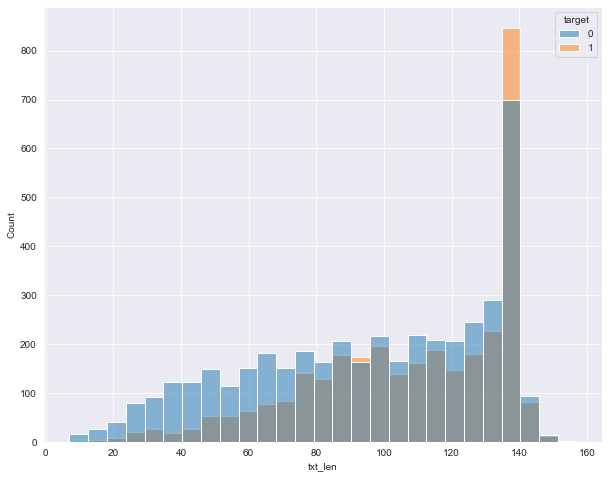

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.histplot(x='txt_len', hue='target', data=df)

In [26]:
df.txt_len.describe()

count    7552.000000
mean      101.256488
std        33.579745
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: txt_len, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

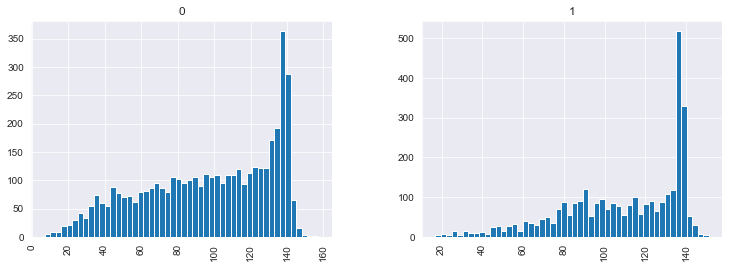

In [27]:
df.hist(column='txt_len', by='target', bins=50, figsize=(12,4))

In [28]:
import string

In [29]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

26410


In [36]:
message4 = df['text'].iloc[4]
print(message4)
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
  (0, 775)	1
  (0, 6012)	1
  (0, 6075)	1
  (0, 7147)	1
  (0, 8925)	1
  (0, 19682)	1
  (0, 22755)	1
  (0, 24094)	1
(1, 26410)


In [37]:
messages_bow = bow_transformer.transform(df['text'])

In [38]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (7552, 26410)
Amount of Non-Zero occurences:  74546


In [42]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.03737609822935586


In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 24094)	0.28976109735611805
  (0, 22755)	0.35701732154742705
  (0, 19682)	0.38598300069115243
  (0, 8925)	0.38598300069115243
  (0, 7147)	0.333631737919999
  (0, 6075)	0.3400734854404268
  (0, 6012)	0.36903916458415215
  (0, 775)	0.35701732154742705


In [44]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(7552, 26410)


In [45]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['target'])

In [48]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.target.iloc[3])

predicted: 0
expected: 0


In [49]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[1 0 1 ... 0 0 0]


In [51]:
from sklearn.metrics import classification_report
print (classification_report(df['target'], all_predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4323
           1       0.97      0.83      0.89      3229

    accuracy                           0.91      7552
   macro avg       0.93      0.90      0.91      7552
weighted avg       0.92      0.91      0.91      7552



In [53]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['target'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

6041 1511 7552


In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=MultinomialNB(), param_grid= params, verbose=3)

In [56]:
cv = CountVectorizer(analyzer=text_process).fit(msg_train)
bow_test = cv.transform(msg_train)
tf_idf_test = TfidfTransformer().fit(bow_test)
tf_out = tf_idf_test.transform(bow_test)

grid.fit(tf_out,label_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.733, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.757, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.740, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.748, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.760, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.733, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=3)

In [57]:
grid.best_params_

{'alpha': 1}

In [58]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB(alpha=0.0001)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [59]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000202CEB07488>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.0001))])

In [60]:
predictions = pipeline.predict(msg_test)

In [61]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       914
           1       0.67      0.71      0.69       597

    accuracy                           0.75      1511
   macro avg       0.74      0.74      0.74      1511
weighted avg       0.75      0.75      0.75      1511



In [63]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [78]:
model = Sequential()
model.add(Dense(7552,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [82]:
bowVal = cv.transform(msg_test)
tfVal = tf_idf_test.transform(bowVal)

In [90]:
tf_out.shape
tfVal.shape

(1511, 22454)

In [91]:
model.fit(x=tf_out.toarray().reshape(6041, 22454), 
          y=label_train.values.reshape((-1,1)), 
          epochs=600,
          validation_data=(tfVal.toarray().reshape(1511, 22454), label_test.values.reshape((-1,1))), verbose=1,
          callbacks=[early_stop]
          )

Train on 6041 samples, validate on 1511 samples
Epoch 1/600
  32/6041 [..............................] - ETA: 1sWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 22454]